<a href="https://colab.research.google.com/github/milieureka/Modeling-non-stationarity-and-finding-an-equilibrium/blob/main/Modeling_non_stationarity_and_finding_an_equilibrium_(AAPL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from datetime import datetime, timedelta
import pandas_datareader as pdr
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [ ]:
#Fetch AAPL data
ticker = "AAPL"
start_date = "2013-12-1"
end_date = "2023-12-11"
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#Perform Augmented Dickey-Fuller (ADF) test to test for non-stationarity in the Apple Stock data
result=adfuller(data["Adj Close"])
adf_stat=result[0]
p_val=result[1]
print(f'ADF Statistic: {adf_stat}')
print(f'p-value: {p_val}')

# Interpret the results
if p_val <= 0.05:
    print("Reject the null hypothesis. The time series is likely stationary.")
else:
    print("Fail to reject the null hypothesis. The time series is likely non-stationary.")
#The output below shows the p-value is 0.98, which is much bigger than 0.05, so we conclude that the Apple Stock data is non-stationary

ADF Statistic: 0.4887416005830389
p-value: 0.9845268593422704
Fail to reject the null hypothesis. The time series is likely non-stationary.


In [ ]:
#Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
result_kpss=kpss(data["Adj Close"])
kpss_test_stat=result_kpss[0]
p_val_kpss=result_kpss[1]
print(f'KPSS Statistic: {kpss_test_stat}')
print(f'p-value: {p_val_kpss}')

# Interpret the results
if p_val_kpss <= 0.05:
    print("Reject the null hypothesis. The time series is likely non-stationary.")
else:
    print("Fail to reject the null hypothesis. The time series is likely stationary.")
#Test statistic is 7.41 (to 2 decimal places) and the p-value is 0.01 (less than 0.05), so we conclude that the stock data is non-stationary (in agreement with the ADF test)

KPSS Statistic: 7.40596138241161
p-value: 0.01
Reject the null hypothesis. The time series is likely non-stationary.


<ipython-input-17-09e4c3c9c0d0>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss=kpss(data["Adj Close"])


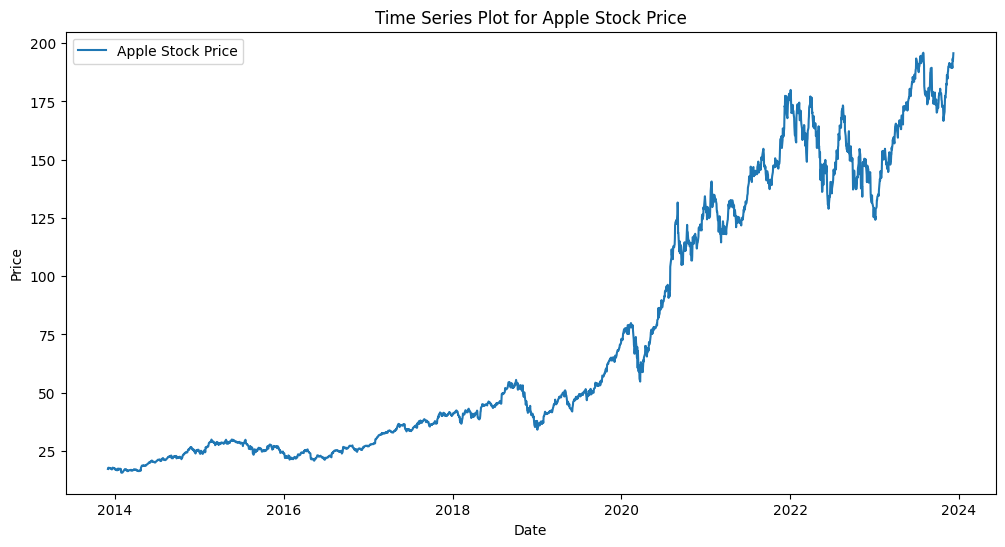

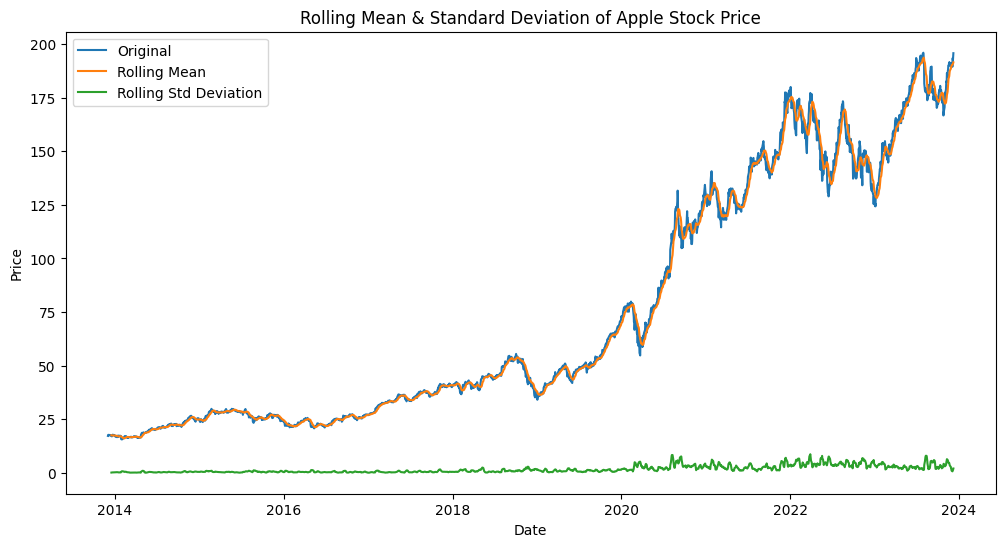

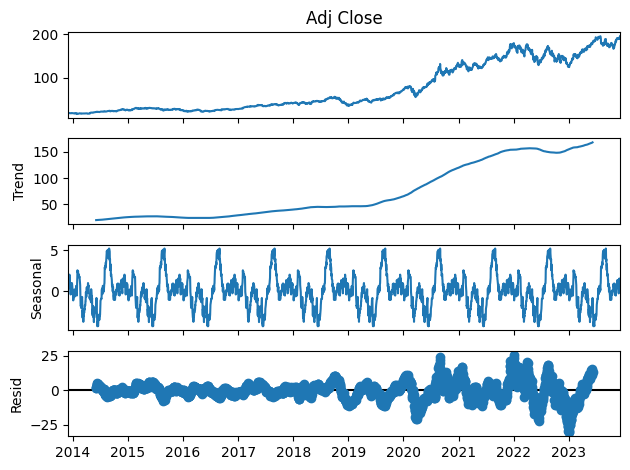

In [ ]:
apple_price = data['Adj Close']

# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(apple_price, label='Apple Stock Price')
plt.title('Time Series Plot for Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Rolling Statistics
rolling_mean = apple_price.rolling(window=12).mean()
rolling_std = apple_price.rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(apple_price, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std Deviation')
plt.title('Rolling Mean & Standard Deviation of Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Decomposition Plot
decomposition = seasonal_decompose(apple_price, model='additive', period=252)
decomposition.plot()
plt.show()

<Figure size 1400x700 with 0 Axes>

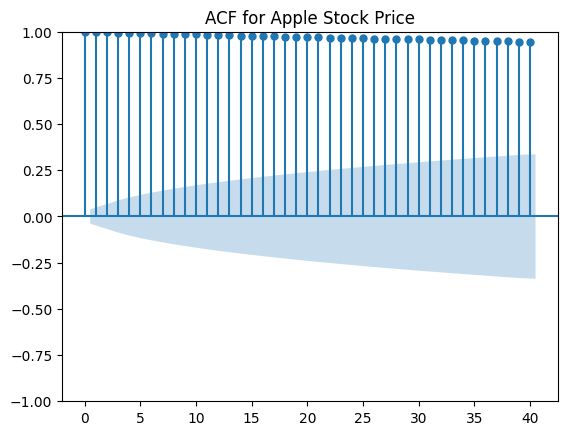

<Figure size 1400x700 with 0 Axes>

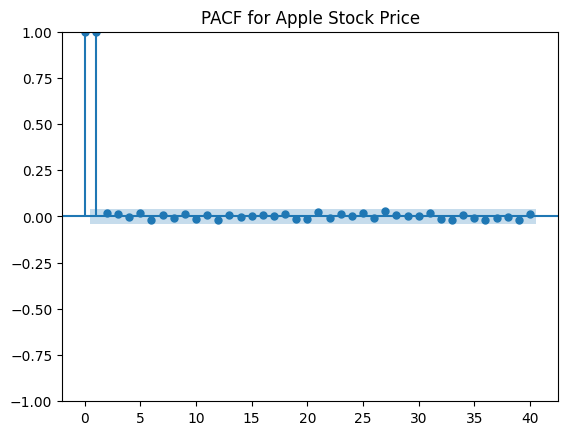

In [ ]:
#Diagnosis plot
# Plot the Autocorrelation Function (ACF)
plt.figure(figsize=(14, 7))
plot_acf(apple_price, lags=40, alpha=0.05)
plt.title('ACF for Apple Stock Price')
plt.show()

# Plot the Partial Autocorrelation Function (PACF)
plt.figure(figsize=(14, 7))
plot_pacf(apple_price, lags=40, alpha=0.05)
plt.title('PACF for Apple Stock Price')
plt.show()